Summary of the Iris dataset:
Number of samples: 150
Number of features: 4
Classes: ['Setosa', 'Versicolor', 'Virginica']

Descriptive statistics:
Mean:
 [5.84333333 3.05733333 3.758      1.19933333]
Standard Deviation:
 [0.82530129 0.43441097 1.75940407 0.75969263]
Minimum values:
 [4.3 2.  1.  0.1]
Maximum values:
 [7.9 4.4 6.9 2.5]


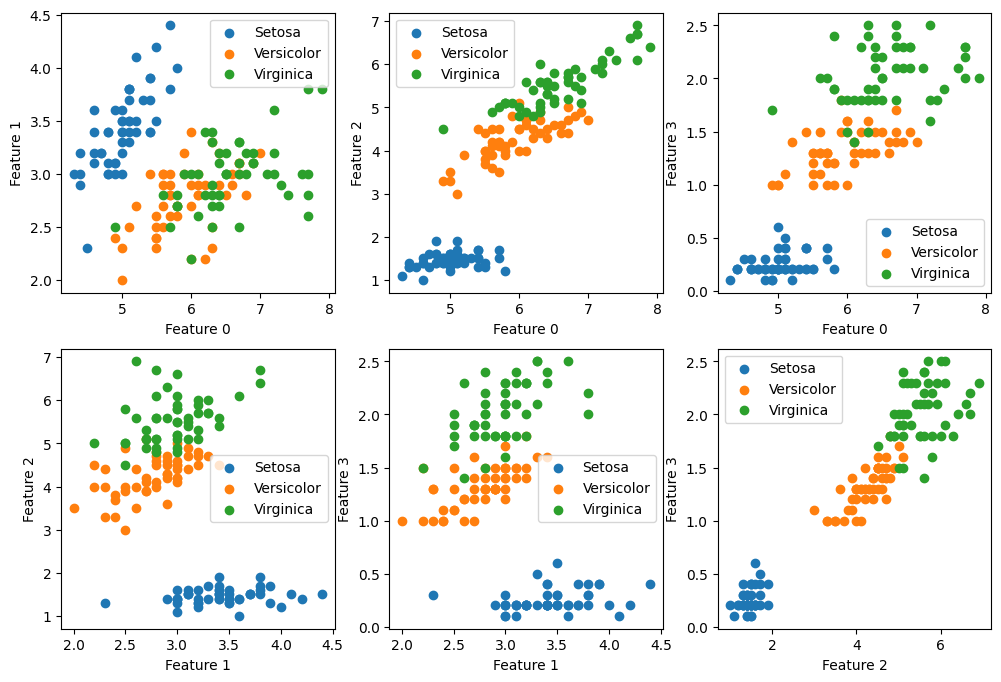


Test Accuracy: 92.31%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def print_dataset_summary(X, y):
    class_names = ['Setosa', 'Versicolor', 'Virginica']
    print("Summary of the Iris dataset:")
    print("Number of samples:", X.shape[0])
    print("Number of features:", X.shape[1])
    print("Classes:", class_names)

def print_descriptive_statistics(X):
    print("\nDescriptive statistics:")
    print("Mean:\n", np.mean(X, axis=0))
    print("Standard Deviation:\n", np.std(X, axis=0))
    print("Minimum values:\n", np.min(X, axis=0))
    print("Maximum values:\n", np.max(X, axis=0))

def plot_scatterplots(X, y):
    plt.figure(figsize=(12, 8))
    plot_number = 1
    class_names = ['Setosa', 'Versicolor', 'Virginica']
    for i in range(X.shape[1]):
        for j in range(i+1, X.shape[1]):
            plt.subplot(2, 3, plot_number)
            plot_number += 1
            for class_label, class_name in enumerate(class_names):
                plt.scatter(X[y == class_label, i], X[y == class_label, j], label=f'{class_name}')
            plt.xlabel(f'Feature {i}')
            plt.ylabel(f'Feature {j}')
            plt.legend()
    plt.show()

def main():
    # Load the iris dataset
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    # Print dataset summary
    print_dataset_summary(X, y)

    # Print descriptive statistics
    print_descriptive_statistics(X)

    # Plot scatterplots
    plot_scatterplots(X, y)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42, stratify=y)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Learn an SVM classifier with an RBF kernel using the training dataset
    svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)
    svm_classifier.fit(X_train, y_train)

    # Predict the classes on the test dataset
    y_pred = svm_classifier.predict(X_test)

    # Compute and print the test accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()
